In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Import Dataframe

In [59]:
df = pd.read_csv('/content/wines_SPA.csv')
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,2018,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


DATA PREPROCESSING AND LABEL ENCODING

In [60]:
df.isnull().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [61]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')

In [62]:
df['year']

0       2013.0
1       2018.0
2       2009.0
3       1999.0
4       1996.0
         ...  
7495    2016.0
7496    2018.0
7497    2017.0
7498    2011.0
7499    2016.0
Name: year, Length: 7500, dtype: float64

In [63]:
df['year'] = 2024 - df['year']

In [64]:
df['year']

0       11.0
1        6.0
2       15.0
3       25.0
4       28.0
        ... 
7495     8.0
7496     6.0
7497     7.0
7498    13.0
7499     8.0
Name: year, Length: 7500, dtype: float64

In [65]:
imputer = SimpleImputer(strategy='median')
df['year'] = imputer.fit_transform(df[['year']])
df['body'] = imputer.fit_transform(df[['body']])
df['acidity'] = imputer.fit_transform(df[['acidity']])

In [66]:
df.isnull().sum()

winery           0
wine             0
year             0
rating           0
num_reviews      0
country          0
region           0
price            0
type           545
body             0
acidity          0
dtype: int64

In [67]:
df['country'].unique()

array(['Espana'], dtype=object)

In [68]:
df['winery'].unique()

array(['Teso La Monja', 'Artadi', 'Vega Sicilia', 'Pago de Carraovejas',
       'Toro Albala', 'Bodegas El Nido', 'Valdespino',
       'Dominio de Pingus', 'Alvaro Palacios', 'Ordonez',
       'Bodegas Valduero', 'Vina Sastre', 'Sierra Cantabria',
       'Descendientes de J. Palacios', 'La Rioja Alta',
       'Marques de Murrieta', 'Vinedos de Paganos', 'Emilio Moro',
       'Quinta de la Quietud', 'Bodegas Mauro',
       'Bodega Contador (Benjamin Romeo)', 'Remirez de Ganuza',
       'Bodegas San Roman', 'Pago de Los Capellanes', 'Bodega Numanthia',
       'Alto Moncayo', 'Mas Doix', 'Finca Moncloa', 'Bodegas Roda',
       'Martinet', 'Recaredo', 'Clos Erasmus', 'Barbadillo',
       'Gonzalez-Byass', 'Bodegas Amaren', 'Alvear', 'Equipo Navazos',
       'Morca', 'Territorio Luthier', 'Rafael Palacios', 'Terra Remota',
       'Dehesa de Los Canonigos', 'Miguel Merino', 'Gutierrez de la Vega',
       'Alion', 'Aalto', 'Carmelo Rodero', 'Dominio del Bendito',
       "Mas d'en Gil", 'Casa 

In [69]:
df['wine'].unique()

array(['Tinto', 'Vina El Pison', 'Unico',
       'Unico Reserva Especial Edicion', 'El Anejon',
       'Don PX Convento Seleccion', 'Cuesta de Las Liebres', 'El Nido',
       'Toneles Moscatel', 'Pingus', 'Don PX Pedro Ximenez',
       "L'Ermita Velles Vinyes Priorat", 'Vatan Arena Tinta de Toro',
       'Ribera Del Duero Gran Reserva 12 Anos', 'Pesus Ribera del Duero',
       'Magico', 'La Faraona Bierzo (Corullon)', 'Gran Reserva 890',
       'Valbuena 5o', 'Castillo Ygay Gran Reserva Especial Blanco',
       'La Nieta', 'Malleolus de Valderramiro',
       'Malleolus de Sanchomartin', 'Alabaster', 'La Mula de la Quietud',
       'Terreus Paraje de Cueva Baja', 'Contador Rioja',
       'Maria Remirez de Ganuza', 'Cartago Paraje de Pozo',
       'Parcela El Picon Tinto', 'Termanthia', 'Clon De La Familia',
       'Aquilon Garnacha', 'Quinon de Valmira',
       '1902 Centenary Carignan Priorat', 'Tintilla de Rota',
       'Cirsion Rioja', 'Cami Pesseroles', "Turo d'en Mota", 'Priorat',


In [70]:
df['region'].unique()

array(['Toro', 'Vino de Espana', 'Ribera del Duero', 'Montilla-Moriles',
       'Jumilla', 'Jerez-Xeres-Sherry', 'Priorato', 'Rioja', 'Bierzo',
       'Castilla y Leon', 'Campo de Borja', 'Cadiz', 'Cava',
       'Jerez Palo Cortado', 'Manzanilla', 'Valdeorras', 'Emporda',
       'Rioja Alta', 'Alicante', 'Somontano', 'Dominio de Valdepusa',
       'Ribeiro', 'Mallorca', 'Yecla', 'Cigales', 'Utiel-Requena',
       'Navarra', 'Rioja Alavesa', 'Costers del Segre', 'Sardon de Duero',
       'Malaga', 'Cataluna', 'Rueda', 'Jerez Pedro Ximenes (PX)',
       'Montsant', 'Conca de Barbera', 'Rias Baixas', 'Jerez Amontillado',
       'Tierra del Vino de Zamora', 'Penedes', 'Dehesa del Carrizal',
       'Madrid', 'Carinena', 'Condado de Huelva', 'Almansa',
       'Jerez Cream', 'Valencia', 'Sierras de Malaga', 'Ribeira Sacra',
       'El Terrerazo', 'Jerez Oloroso', 'Castilla', 'Alella',
       'Pla i Llevant', 'Pla de Bages', 'Pago Calzadilla', 'Andalucia',
       'Monterrei', 'Ribera del Galle

In [71]:
df = df.drop(columns = ['country'], axis=1)

In [72]:
df['type'] = df['type'].fillna('')

In [73]:
df['type'] = df['type'].replace('', 'N/A')

In [74]:
df.isnull().sum()

winery         0
wine           0
year           0
rating         0
num_reviews    0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64

# LABEL ENCODING

In [75]:
label_encoder = LabelEncoder()
df['winery_encoded'] = label_encoder.fit_transform(df['winery'])
df['type_encoded'] = label_encoder.fit_transform(df['type'])
df['region_encoded'] = label_encoder.fit_transform(df['region'])
df['wine_encoded'] = label_encoder.fit_transform(df['wine'])
df.drop(columns=['winery', 'type', 'region','wine',], inplace=True)

In [76]:
df.head()

,year,rating,num_reviews,price,body,acidity,winery_encoded,type_encoded,region_encoded,wine_encoded
0,11.0,4.9,58,995.00,5.0,3.0,422,20,69,759
1,6.0,4.9,31,313.50,4.0,2.0,33,19,74,819
2,15.0,4.8,1793,324.95,5.0,3.0,447,12,57,778
3,25.0,4.8,1705,692.96,5.0,3.0,447,12,57,778
4,28.0,4.8,1309,778.06,5.0,3.0,447,12,57,778


In [77]:
Scaler = StandardScaler()

In [78]:
X = df.drop(columns=['price'], axis=1)

In [79]:
Y = df['price']

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            7500 non-null   float64
 1   rating          7500 non-null   float64
 2   num_reviews     7500 non-null   int64  
 3   price           7500 non-null   float64
 4   body            7500 non-null   float64
 5   acidity         7500 non-null   float64
 6   winery_encoded  7500 non-null   int64  
 7   type_encoded    7500 non-null   int64  
 8   region_encoded  7500 non-null   int64  
 9   wine_encoded    7500 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 586.1 KB


In [81]:
standarized_type_price = Scaler.fit_transform(df['price'].values.reshape(-1, 1))
print(standarized_type_price)

[[ 6.21832388]
 [ 1.68546605]
 [ 1.76162338]
 ...
 [-0.23709089]
 [ 0.02929349]
 [-0.18933459]]


In [82]:
standardize_X = Scaler.fit_transform(X)
print(standardize_X)

[[ 0.08134319  5.46568628 -0.54375417 ...  2.13055749  1.08636959
   1.25737416]
 [-0.65280115  5.46568628 -0.58110097 ...  1.87197376  1.37526284
   1.51655555]
 [ 0.66865866  4.61838064  1.85612304 ...  0.0618877   0.39302579
   1.33944827]
 ...
 [-0.50597228 -0.46545323 -0.08452695 ... -0.19669602 -1.51366967
  -0.71672409]
 [ 0.37500093 -0.46545323 -0.08591016 ...  0.0618877   0.39302579
  -0.54393649]
 [-0.35914341 -0.46545323 -0.08729338 ...  0.0618877   0.39302579
   0.55326472]]


In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [84]:
print(X.shape, X_train.shape, X_test.shape)

(7500, 9) (6000, 9) (1500, 9)


# CORRELATION MATRIX

In [85]:
correlation = df.corr()

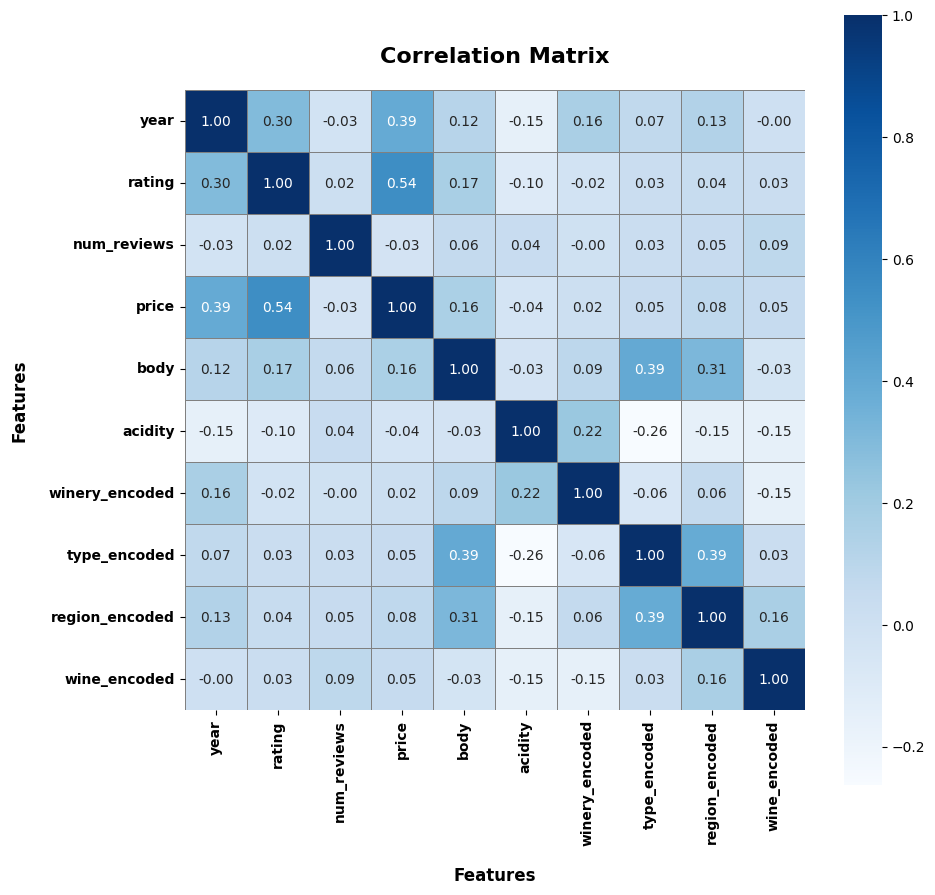

In [86]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size': 10}, cmap='Blues', linewidths=0.5, linecolor='gray')
plt.title("Correlation Matrix", fontsize=16, fontweight='bold', pad=20)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.xlabel('Features', fontsize=12, fontweight='bold', labelpad=15)
plt.ylabel('Features', fontsize=12, fontweight='bold', labelpad=15)
plt.show()


# TRAIN MODELS

In [87]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)

In [90]:
svr.fit(X_train, Y_train)

SVR()

In [92]:
X_train_prediction = svr.predict(X_train)
mse_train = mean_squared_error(X_train_prediction, Y_train)

In [110]:
r2 = r2_score(Y_train, X_train_prediction)
print(r2)

-0.0030094880014468472


In [111]:
print(mse_train)

26290.01464334939


In [95]:
X_test_prediction = svr.predict(X_test)
mse_test = mean_squared_error(X_test_prediction, Y_test)

In [96]:
print(mse_test)

26290.01464334939


In [112]:
r2 = r2_score(Y_test, X_test_prediction)
print(r2)

-0.006143814632689093
